# Importing Packages 

In [1]:
import pandas as pd
import sklearn as sk
import csv as csv
import numpy as np
import scipy as sp
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [2]:
# import dataset 
data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Cleaning the data

In [3]:
# Cleaning and optimizing data so we keep features that will help provide meaningful input and omit those that will not contribute relevant values
# In this case, we can see just by looking at the data that the last column "Unnamed" is just filled with NaN values and will not help us train the data.
# Additionally, the first "id" column stores different numeric identification values for each entry, which is not helpful. We omit it as well.

data.drop(['Unnamed: 32',"id"], axis=1, inplace=True)
print(data.shape)
# We have 569 rows or samples and 30 features (+1 describing whether the tumor is malignant or benign)

(569, 31)


In [4]:
# Want to see how many malignant and benign tumors we are looking at
print(data.groupby('diagnosis').size())

diagnosis
B    357
M    212
dtype: int64


In [5]:
# Creating a vector for the diagnosis values. 
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y_data = data.diagnosis.values
x_data = data.drop(['diagnosis'], axis=1)
x_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Inspecting the Data

In [6]:
# We inspected the remaining features for potential extraneous values that could cause skewed data, and kept an eye out for collective groups of outliers.
# In order to view the statistics in a more readable way, we've used the function describe and have Transposed it.
# Because each of the entries had the same count value of 569 (in accordance with the number of entries), we omitted this column it as it did not provide meaningful information. 
x_data.describe().T.drop(['count'],axis=1)

,mean,std,min,25%,50%,75%,max
radius_mean,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## Histograms

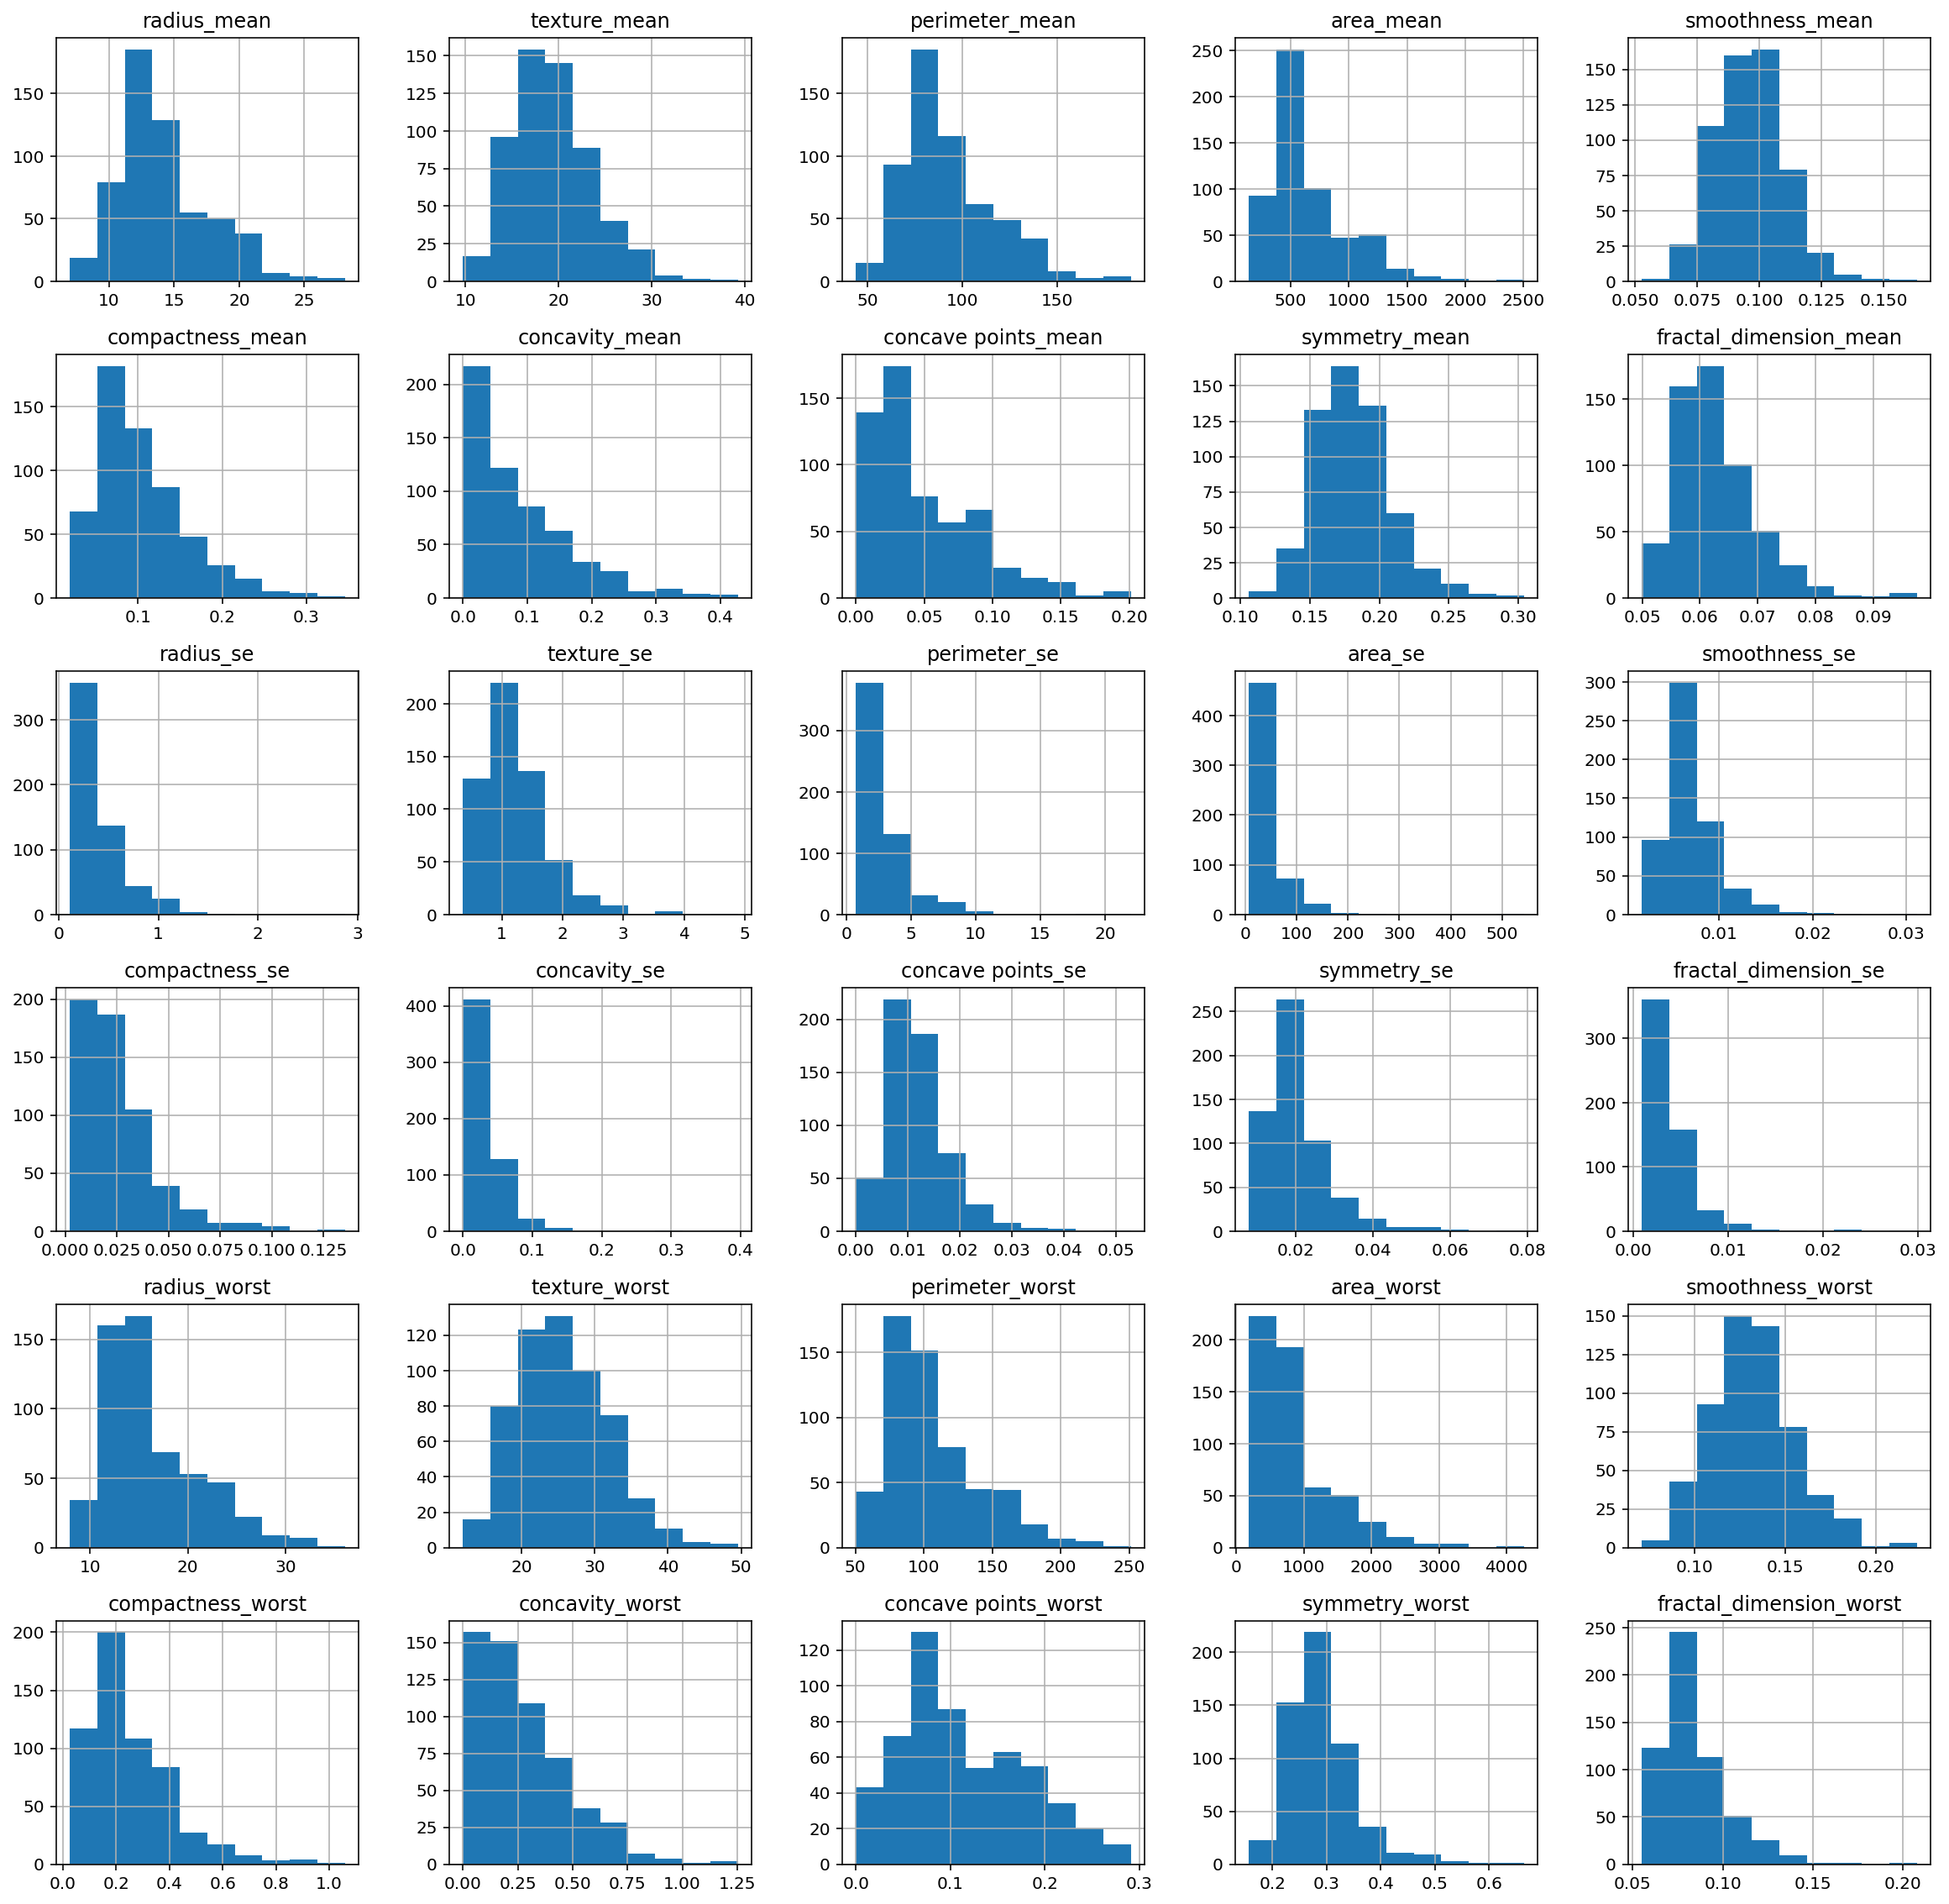

In [7]:
# While the describe function did give us valuable statistical numbers, it may not always be easy to clearly see outliers and potential problems.
# We displayed data in histograms in order to visually confirm if any really outlandish outliers might need to be accounted for.
x_data_copy = x_data.copy(deep=True) 
histograms = x_data_copy.hist(figsize = (20,20))

In [8]:
# In this case, while there are a few outliers, we are opting to keep them just in case an outlier could indicate a Malignant tumor.
# As we also have a fairly small data set, we wished to keep as many data points as possible to produce better training and test data results.

## Heat Map

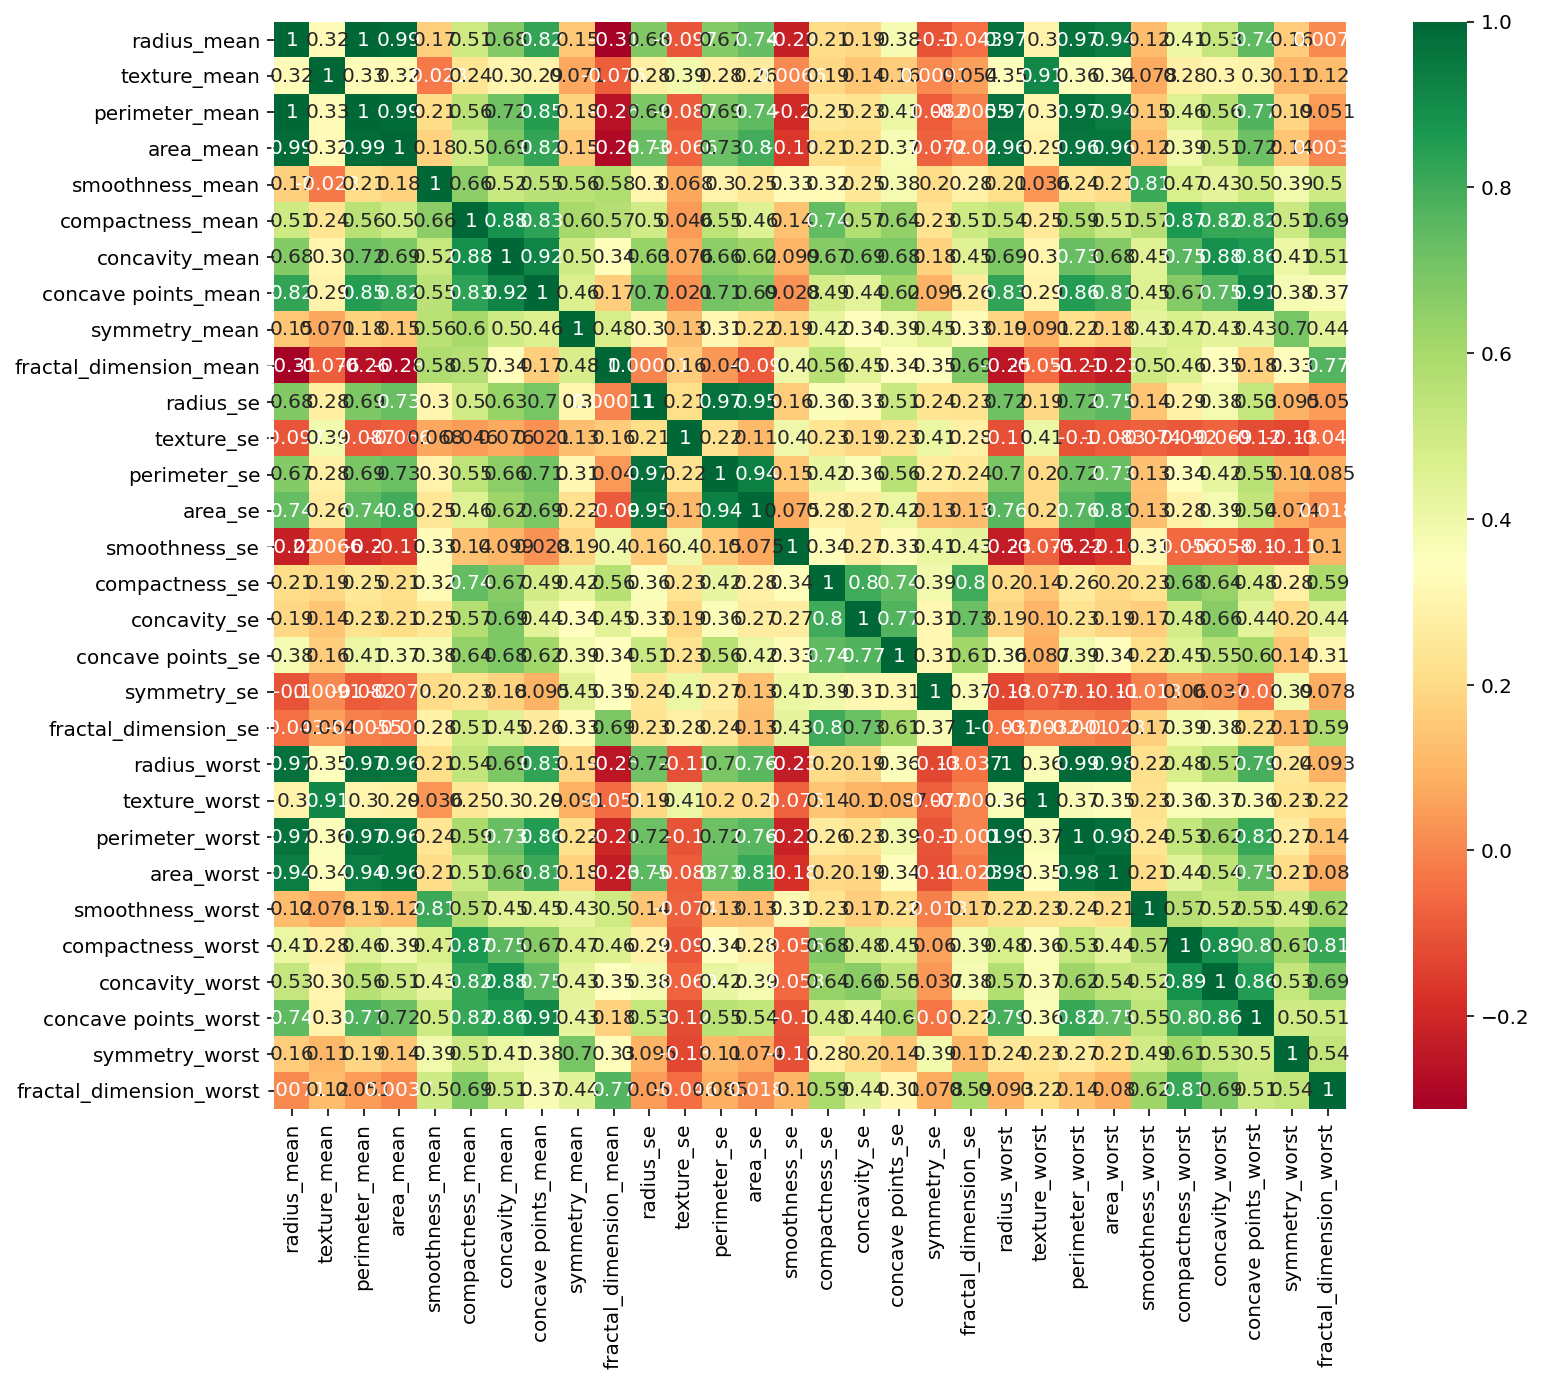

In [9]:
#Heat map to show the correlation between the features
#Interesting Observation: the set of worst features had higher correlation, which could indicate abnormally shaped tumors
#As expected, the mean and perimeter had high correlation
#Overall, dataset looks good for training a model
x_data_copy = x_data.copy(deep=True) 
plt.figure(figsize=(12,10))
p = sns.heatmap(x_data_copy.corr(), annot=True,cmap ='RdYlGn')

# Divide into training and test data

In [10]:
#divide data
#Its important to divide the data into test and train datasets in order to get a clear indication of how the model works when new data points are added.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, random_state=42)

print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (398, 30)
x test:  (171, 30)
y train:  (398,)
y test:  (171,)


# Applying Machine Learning Models

In [11]:
#We are hoping to apply various classifiers we've learned in class to see how each model fairs against each other, and the find the best model.
#These include logistic regression, support vector machine, random forest, k-nearest neighbors, and naive bayes
#We will mainly look at the following scores to compare our models: accuracy_score, f1_score, roc_auc_score

In [12]:
#Import all the tools we will need to train and evaluate our models
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, roc_curve, classification_report
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [13]:
# Train the algorithms
# Append the five models we will be trying to an array
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
results = []
names = []

# Loop through the models to compare their accuracy, f1_score, and roc_auc using a Stratified K Fold
# Stratified K Fold: variation of the k fold (splitting the data into groups for cross validation)
# where it ensures that each fold has the same proportion of observations with a given categorical value
# Accuracy: correctly predicted data points out of all data points; primary method of comparing models
# f1_score: the harmonic mean of the precision and recall of the data set
# which is used as another measure of the test's accuracy; best score is 1
# ROC_AUC_score: area under the receiving operating characteristic (ROC) curve; best is around 1
for name, model in models:
    model.fit(x_train, y_train)
    #10 fold cross validation
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    scoring = ['accuracy', 'f1_weighted', 'roc_auc']
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    scores = cross_validate(model, x_train, y_train, scoring=scoring, cv=kfold)
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    print('accuracy: %f (%f) f1_weighted: %f roc_auc: %f \n' % (scores['test_accuracy'].mean(), scores['test_accuracy'].std(), scores['test_f1_weighted'].mean(), scores['test_roc_auc'].mean()))

LR: 0.939936 (0.048944)
accuracy: 0.939936 (0.048944) f1_weighted: 0.939639 roc_auc: 0.988267 



RF: 0.952244 (0.020959)
accuracy: 0.957244 (0.027692) f1_weighted: 0.957157 roc_auc: 0.987600 

KNN: 0.909744 (0.044847)
accuracy: 0.909744 (0.044847) f1_weighted: 0.907602 roc_auc: 0.947372 



NB: 0.937244 (0.034009)
accuracy: 0.937244 (0.034009) f1_weighted: 0.936841 roc_auc: 0.984057 



SVM: 0.625641 (0.005875)
accuracy: 0.625641 (0.005875) f1_weighted: 0.481582 roc_auc: 0.931444 



In [14]:
#Support Vector Machines with Linear Kernel
# Before comparing algorithms, we noticed that the SVM was particularly low. 
# This is because we previously used an RBF kernel with default parameters that may not have been optimal
# With a linear kernel, the model fairs better
model = ('SVM_LK', SVC(kernel='linear'))
model[1].fit(x_train, y_train)
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(model[1], x_train, y_train, cv=kfold, scoring='accuracy')
scores = cross_validate(model[1], x_train, y_train, scoring=scoring, cv=kfold)
print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
print('accuracy: %f (%f) f1_weighted: %f roc_auc: %f \n' % (scores['test_accuracy'].mean(), scores['test_accuracy'].std(), scores['test_f1_weighted'].mean(), scores['test_roc_auc'].mean()))
results.append(cv_results)
names.append(model[0])
models.append(model)

SVM: 0.942308 (0.029586)
accuracy: 0.942308 (0.029586) f1_weighted: 0.941971 roc_auc: 0.988800 



# Comparing Algorithms Using the Cross-Validation

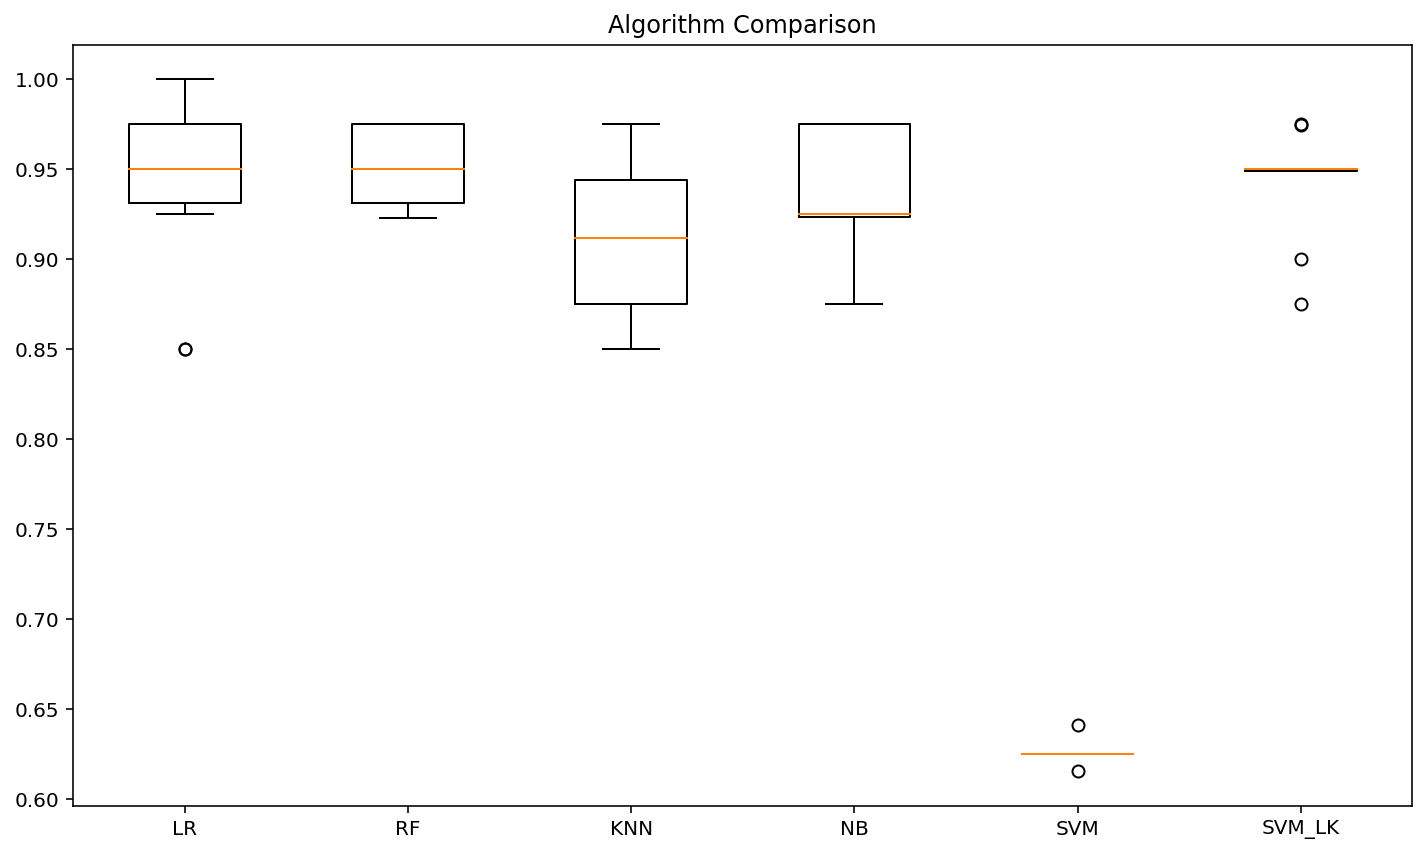

In [15]:
# Boxplots for a visual comparison
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [16]:
# The results of these models look great. We've got very high accuracies, but we will need to validate using the test data.
# The top two models with the highest scores all-around were the SVM with the linear kernel and the Random Forest Classifier
# We will compare their accuracies on the test data set for an impartial evaluation of our models

# Testing Top Two Models for Accuracy

In [17]:
#Evaluate SVM with Linear Kernel using Test Data
modelselection = models[5]
print(modelselection[0])
model = modelselection[1]
prediction = model.predict(x_test)
accuracy = accuracy_score(prediction,y_test)
print("Accuracy : %s" % "{0:.3%}".format(accuracy))

SVM_LK
Accuracy : 96.491%


In [18]:
#Evaluate Random Forest Classifier using Test Data
modelselection = models[1]
print(modelselection[0])
model = modelselection[1]
predictions = model.predict(x_test)
accuracy = accuracy_score(predictions,y_test)
print("Accuracy : %s" % "{0:.3%}".format(accuracy))

RF
Accuracy : 97.076%


In [19]:
# The Random Forest Classifier has an accuracy of 97.076% on the test data!
# We will evaluate this model further in the next section

# Evaluating Our Final Model: Random Forest Classifier

In [20]:
# We will look at the confusion matrix, the classification report, and the ROC curve of the Random Forest Classifier

In [21]:
# There are very few false positives (1) and false negatives (4).
# Minimizing the number of false negatives is particularly important in this disease context
# This is because each false negative would be a missed diagnosis of a malignant tumor
# Even a number as low as 4 would mean 4 patients' tumors were misclassified as harmless when they were cancerous
# Howewever, this is still an amazing tool for physicians and doctors to support their diagnoses
confusion_matrix(y_test,predictions)
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predictions'], margins=True)

Predictions,0,1,All
True,,,
0,107,1,108
1,4,59,63
All,111,60,171


In [22]:
# Classification Report
print(classification_report(y_test, predictions))
# 98% precision for classifying malignant tumors is fairly high, and particularly important 
# In general, these numbers look very good

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



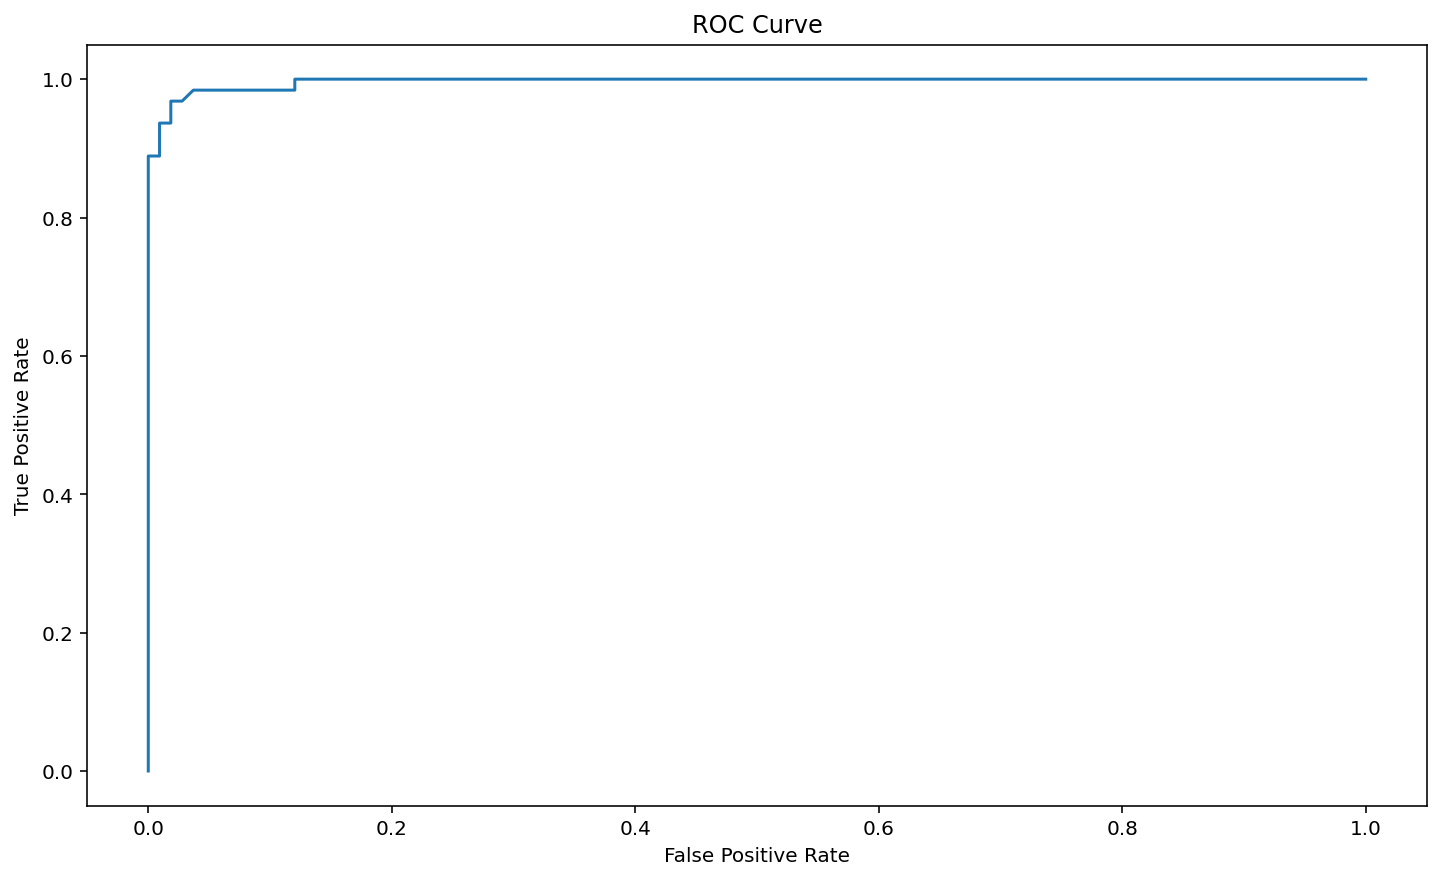

In [23]:
# ROC Curve
modelselection = models[1]
model = modelselection[1]
y_probas = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probas)
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
# Looks good: Area is close to 1, False Positive Rate is Very Low, and True Positive Rate is very high

In [24]:
# The Random Forest Classifier looks to be a very good machine learning algorithm for this dataset.

In [25]:
feature_imp = pd.Series(model.feature_importances_,index=x_data.columns).sort_values(ascending=False)
print(feature_imp)

concave points_mean        0.161336
concave points_worst       0.156543
perimeter_worst            0.118674
area_worst                 0.104791
concavity_worst            0.065252
radius_worst               0.054480
area_se                    0.039348
radius_mean                0.031616
concavity_mean             0.031165
perimeter_mean             0.029011
area_mean                  0.028185
perimeter_se               0.019115
texture_worst              0.017995
compactness_mean           0.017684
radius_se                  0.017494
texture_mean               0.014630
symmetry_worst             0.012302
smoothness_worst           0.010922
compactness_worst          0.010297
concavity_se               0.008403
compactness_se             0.007180
symmetry_se                0.007005
fractal_dimension_se       0.005830
fractal_dimension_worst    0.005731
texture_se                 0.005259
smoothness_se              0.004791
concave points_se          0.004314
smoothness_mean            0